# 3 Bifurcations
---

**Overview**

- [3.0 Introduction](#3.0-Introduction)
- [3.1 Saddle-Node Bifurcation](#3.1-Saddle-Node-Bifurcation)
- [3.2 Transcritical Bifurcation](#3.2-Transcritical-Bifurcation)
- [3.3 Laser Threshold](#3.3-Laser-Threshold)
- [3.4 Pitchfolk Bifurcation](#3.4-Pitchfolk-Bifurcation)
- [3.5 Overdamped Bead on a Rotating Hoop](#3.5-Overdamped-Bead-on-a-Rotating-Hoop)
- [3.6 Imperfect Bifurcation and Catastrophes](#3.6-Imperfect-Bifurcation-and-Catastrophes)
- [3.7 Insect Outbreak](#3.7-Insect-Outbreak)

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
marker = ['o', 'x', 's']

## 3.0 Introduction
---

- **Bifuractions**

## 3.1 Saddle-Node Bifurcation
---

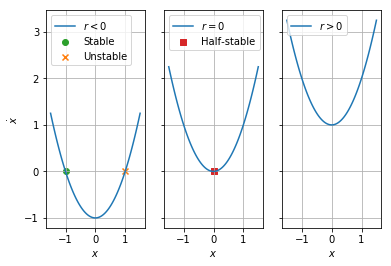

In [32]:
def f(x, r):
    y = r + x**2
    return y

x = np.linspace(-1.5, 1.5, 100)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, sharey=True)

ax0.plot(x, f(x, -1), label=r'$r<0$')
ax0.scatter(-1, f(-1, -1), label='Stable', c=c[2], marker=marker[0])
ax0.scatter(1, f(1, -1), label='Unstable', c=c[1], marker=marker[1])
ax0.set(xlabel=r'$x$', ylabel=r'$\dot{x}$')
ax0.grid(True)
ax0.legend(loc='upper left')

ax1.plot(x, f(x, 0), label=r'$r=0$')
ax1.scatter(0, f(0, 0), label='Half-stable', c=c[3], marker=marker[2])
ax1.set(xlabel=r'$x$')
ax1.grid(True)
ax1.legend(loc='upper left')

ax2.plot(x, f(x, 1), label=r'$r>0$')
ax2.set(xlabel=r'$x$')
ax2.grid(True)
ax2.legend(loc='upper left')

plt.show()

### Graphical Conventions

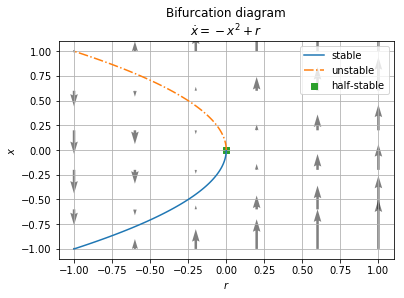

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, r):
    y = - x**2 + r
    return y

def g(x, r):
    y = x**2 + r
    return y

x = np.linspace(-1, 0, 100)
y = f(x, 0)
plt.plot(y, x, label='stable')

x = np.linspace(0, 1, 100)
y = f(x, 0)
plt.plot(y, x, label='unstable', linestyle='-.')

X, Y = np.meshgrid(np.arange(-1, 1.2, 0.4), np.arange(-1, 1.2, 0.4))
# U, V = np.meshgrid(X, Y)
plt.quiver(Y, X, np.repeat(0, len(X)*len(Y)), g(X, Y), alpha=.5)

plt.scatter(0, 0, marker='s', label='half-stable', color='#2ca02c')

plt.title('Bifurcation diagram\n' r'$\dot{x} = - x^2 + r$')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.legend(loc='best')
plt.grid(True)

plt.show()

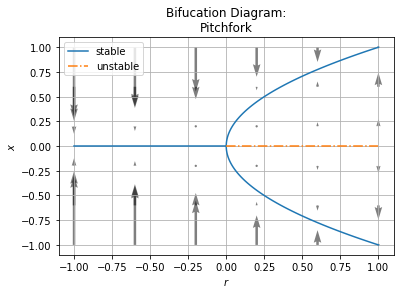

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, r):
    y = - x**3 + x*r
    return y

# def fixed(x):
#     if x == 0:
#         r = 0
#     elif x != 0:
#         r = x**2
    
#     return r


X, Y = np.meshgrid(np.arange(-1, 1.1, 0.4), np.arange(-1, 1.1, 0.4))

plt.quiver(Y, X, np.repeat(0, len(X)*len(Y)), f(X, Y), color='k', alpha=0.5)

x = np.linspace(-1, 1, 100)

plt.plot(x**2, x, label='stable')

r = np.linspace(0, 1, 100)

plt.plot(-r, np.repeat(0, len(r)), label='stable', color='#1f77b4')
plt.plot(r, np.repeat(0, len(r)), label='unstable', linestyle='-.')

plt.title('Bifucation Diagram:\nPitchfork')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.grid(True)
plt.legend(loc='best')

plt.show()

### Terminology

Saddle-node bifurcation 
aka, **Fold bifurcation**, **Tuning-point bifurcation**, **Blue sky bifurcation**

### Exmaple 3.1.1

linear stability analysis of fixed point: $\dot{x} = f(x) = r - x^2$

### Example 3.1.2

$$\dot{x} = r - x - e^{-x}$$

*Solution:*




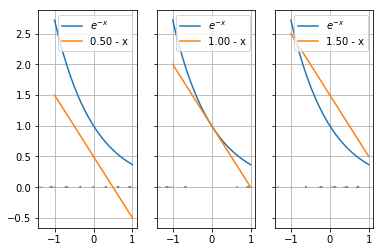

In [47]:
def f(x, r):
    y = r - x - np.exp(-x)
    return y

def f_1(x):
    y = np.exp(-x)
    return y

def f_2(x, r):
    y = r - x
    return y

r = np.linspace(0.5, 1.5, 3)
x = np.linspace(-1, 1, 100)
x_flow = np.linspace(-1.3, 1, 8)

# fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, sharey=True)
fig, axes = plt.subplots(ncols=3, sharey=True)

for i in range(3):
    axes[i].plot(x, f_1(x), label=r'$e^{-x}$')
    axes[i].plot(x, f_2(x, r[i]), label = (r'%.2f - x' % r[i]))
    axes[i].quiver(x_flow, 0, f(x_flow, r[i]), 0)
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

plt.show()

## 3.6 Imperfect Bifurcation and Catastrophes

$$\dot{x} = h + rx + x^3$$

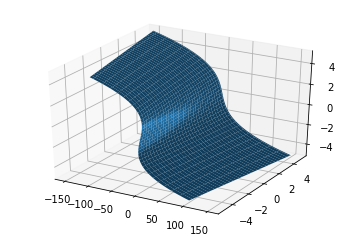

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fixed(x, r):
    h = - r*x - x**3
    return h

x, r = np.arange(-5, 5.01, 0.1), np.arange(-5, 5.01, 0.1)
x, r = np.meshgrid(x, r)
h = fixed(x, r)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(h, r, x)

# Axes3D.plot_wireframe(X, Y, Z)
plt.show()

# print(X)
# print(Y)
# print(Z)

---
**Overview**

- [3.0 Introduction](#3.0-Introduction)
- [3.1 Saddle-Node Bifurcation](#3.1-Saddle-Node-Bifurcation)
    - [Graphical Conventions](#Graphical-Conventions)
    - [Terminology](#Terminology)
    - [Exmaple 3.1.1](#Exmaple-3.1.1)
- [3.2 Transcritical Bifurcation](#3.2-Transcritical-Bifurcation)
- [3.3 Laser Threshold](#3.3-Laser-Threshold)
- [3.4 Pitchfolk Bifurcation](#3.4-Pitchfolk-Bifurcation)
- [3.5 Overdamped Bead on a Rotating Hoop](#3.5-Overdamped-Bead-on-a-Rotating-Hoop)
- [3.6 Imperfect Bifurcation and Catastrophes](#3.6-Imperfect-Bifurcation-and-Catastrophes)
- [3.7 Insect Outbreak](#3.7-Insect-Outbreak)